In [89]:
from binsmooth import BinSmooth
import numpy as np

bin_edges = np.array([0, 10000, 15000, 25000, 35000, 50000, 75000, 100000, 150000, 200000, 660000])
counts = np.array([0, 51, 39, 55, 49, 70, 116, 108, 173, 120, 202, 17])
mean_estimate = 146162

bs = BinSmooth()
bs.fit(bin_edges, counts, m=mean_estimate)

/Users/jerryli/miniconda3/envs/vis/lib/python3.12/site-packages/scipy/optimize/_optimize.py:807: RuntimeWarning: overflow encountered in multiply
  sim = np.where(msk, 2*upper_bound - sim, sim)


In [112]:
xs = np.linspace(0, 1000000, 201)
ys = bs.cdf(xs)
dx = xs[1] - xs[0]
ys2 = np.diff(ys, prepend=[0]) / dx
ys2

array([0.00000000e+00, 4.34642857e-06, 5.85357143e-06, 7.80000000e-06,
       5.84870512e-06, 5.15129488e-06, 4.99860467e-06, 4.80139533e-06,
       4.72343868e-06, 4.64236738e-06, 4.63419394e-06, 4.67573444e-06,
       4.69418109e-06, 4.67631387e-06, 4.62213278e-06, 4.53163782e-06,
       4.48750307e-06, 4.46986327e-06, 4.38611174e-06, 4.23624847e-06,
       4.02027345e-06, 3.86482977e-06, 3.80616706e-06, 3.73576705e-06,
       3.65362974e-06, 3.55975514e-06, 3.45414324e-06, 3.33679404e-06,
       3.20770755e-06, 3.06688375e-06, 2.91432267e-06, 2.88565217e-06,
       2.94650361e-06, 2.94406473e-06, 2.87833556e-06, 2.74931609e-06,
       2.55700632e-06, 2.30140624e-06, 1.98251587e-06, 1.60033519e-06,
       1.15486421e-06, 9.04401489e-07, 8.91206533e-07, 8.78110551e-07,
       8.65113543e-07, 8.52215509e-07, 8.39416448e-07, 8.26716362e-07,
       8.14115250e-07, 8.01613111e-07, 7.89209947e-07, 7.76905756e-07,
       7.64700540e-07, 7.52594297e-07, 7.40587029e-07, 7.28678734e-07,
      

In [113]:
ys

array([0.        , 0.02173214, 0.051     , 0.09      , 0.11924353,
       0.145     , 0.16999302, 0.194     , 0.21761719, 0.24082903,
       0.264     , 0.28737867, 0.31084958, 0.33423115, 0.35734181,
       0.38      , 0.40243752, 0.42478683, 0.44671739, 0.46789863,
       0.488     , 0.50732415, 0.52635498, 0.54503382, 0.56330197,
       0.58110074, 0.59837146, 0.61505543, 0.63109397, 0.64642839,
       0.661     , 0.67542826, 0.69016078, 0.7048811 , 0.71927278,
       0.73301936, 0.74580439, 0.75731142, 0.767224  , 0.77522568,
       0.781     , 0.78552201, 0.78997804, 0.79436859, 0.79869416,
       0.80295524, 0.80715232, 0.8112859 , 0.81535648, 0.81936454,
       0.82331059, 0.82719512, 0.83101863, 0.8347816 , 0.83848453,
       0.84212793, 0.84571227, 0.84923807, 0.85270581, 0.85611598,
       0.85946909, 0.86276563, 0.86600609, 0.86919097, 0.87232076,
       0.87539595, 0.87841705, 0.88138455, 0.88429893, 0.88716071,
       0.88997037, 0.8927284 , 0.8954353 , 0.89809157, 0.90069

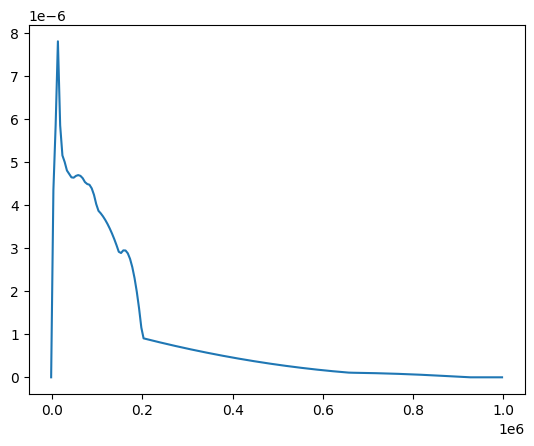

In [114]:
import matplotlib.pyplot as plt
# from scipy.interpolate import make_interp_spline, BSpline

# spl = make_interp_spline(T, power, k=3)
# smooth_ys2 = spl(ys2)
plt.plot(xs - dx/2, ys2)

/var/folders/0r/gs0ch5nn3fzcwqj_9c2f99v40000gn/T/ipykernel_33231/1803096244.py:1: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


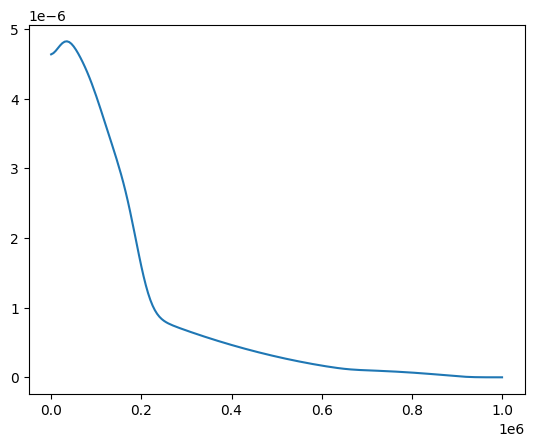

In [115]:
from scipy.ndimage.filters import gaussian_filter1d

ys3 = gaussian_filter1d(ys2, sigma=5)
plt.plot(xs, ys3)

In [116]:
import pandas as pd

df = pd.DataFrame({'income': xs, 'pdf': ys3, 'cdf': ys})
df.to_csv('income_dist.csv')
# pd.to_csv

In [117]:
ys

array([0.        , 0.02173214, 0.051     , 0.09      , 0.11924353,
       0.145     , 0.16999302, 0.194     , 0.21761719, 0.24082903,
       0.264     , 0.28737867, 0.31084958, 0.33423115, 0.35734181,
       0.38      , 0.40243752, 0.42478683, 0.44671739, 0.46789863,
       0.488     , 0.50732415, 0.52635498, 0.54503382, 0.56330197,
       0.58110074, 0.59837146, 0.61505543, 0.63109397, 0.64642839,
       0.661     , 0.67542826, 0.69016078, 0.7048811 , 0.71927278,
       0.73301936, 0.74580439, 0.75731142, 0.767224  , 0.77522568,
       0.781     , 0.78552201, 0.78997804, 0.79436859, 0.79869416,
       0.80295524, 0.80715232, 0.8112859 , 0.81535648, 0.81936454,
       0.82331059, 0.82719512, 0.83101863, 0.8347816 , 0.83848453,
       0.84212793, 0.84571227, 0.84923807, 0.85270581, 0.85611598,
       0.85946909, 0.86276563, 0.86600609, 0.86919097, 0.87232076,
       0.87539595, 0.87841705, 0.88138455, 0.88429893, 0.88716071,
       0.88997037, 0.8927284 , 0.8954353 , 0.89809157, 0.90069